In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
red_wine = pd.read_csv("winequality-red.csv", sep= ";")
white_wine = pd.read_csv("winequality-white.csv", sep= ";")

In [133]:
red_wine["color"]= "Red"
white_wine["color"]= "White"

In [134]:
wine = pd.concat([red_wine, white_wine])

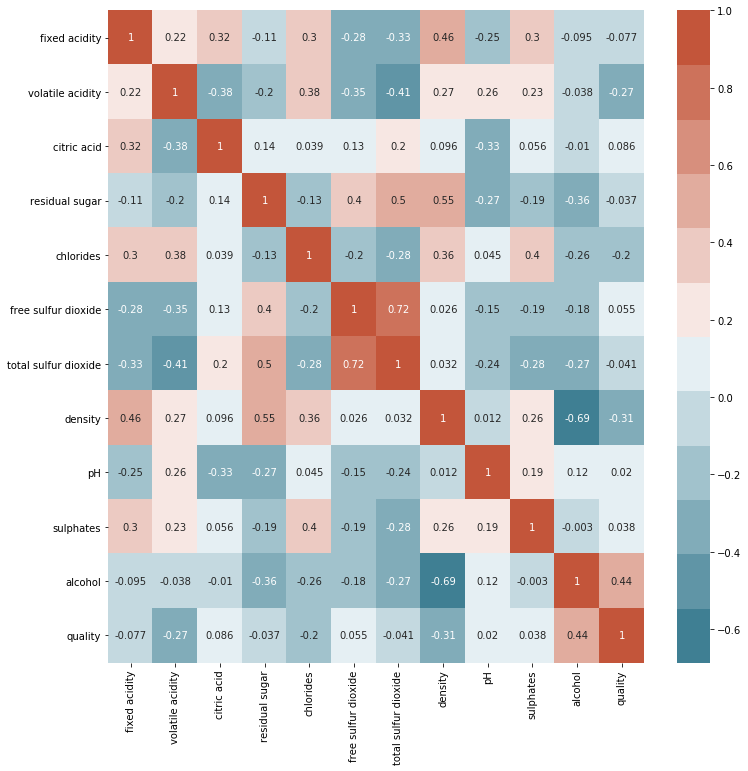

In [135]:
plt.figure(figsize=(12, 12))
df_corr = wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.show()

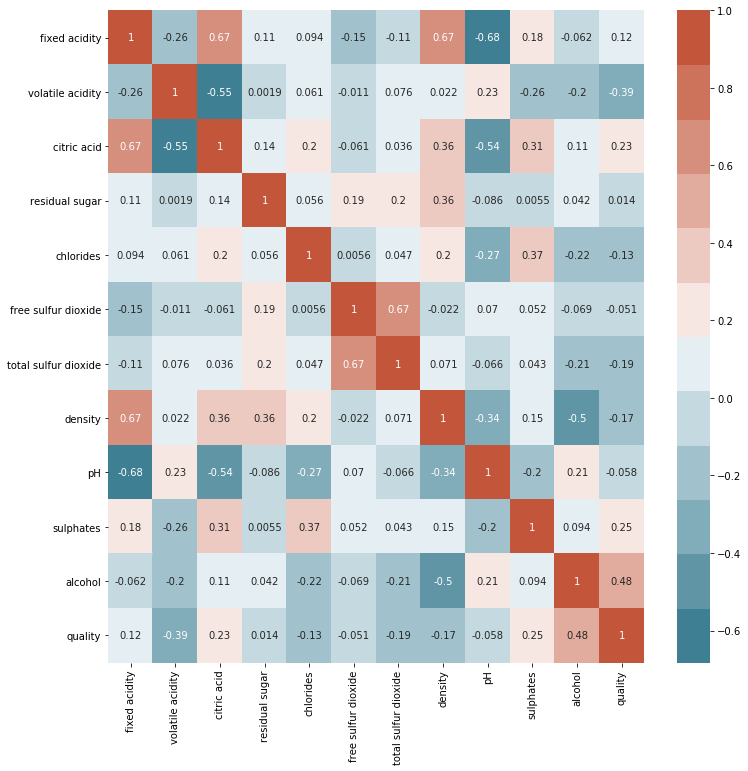

In [136]:
plt.figure(figsize=(12, 12))
df_corr = red_wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.show()

In [137]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [139]:
X = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = red_wine[["quality"]]

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [164]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [167]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred_lin_reg = lin_reg.predict(X_test)
print_evaluate(y_test, pred_lin_reg)

MAE: 0.5035304415524375
MSE: 0.3900251439639539
RMSE: 0.6245199307980122
R2 Square 0.40318034127962354


In [145]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print_evaluate(y_test, pred)

MAE: 0.5925012675416456
MSE: 0.5710403020596518
RMSE: 0.7556720863308714
R2 Square 0.1261894688966012


In [146]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.5057883195080455
MSE: 0.3929488678812797
RMSE: 0.6268563375138515
R2 Square 0.39870643507758574


In [147]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.661034842230632
MSE: 0.6476147191182037
RMSE: 0.8047451268061234
R2 Square 0.009014670905063582


In [148]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.657915812915393
MSE: 0.6480323238210814
RMSE: 0.8050045489443407
R2 Square 0.00837564878018604


In [168]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.453125
MSE: 0.590625
RMSE: 0.7685213074469699
R2 Square 0.09622080425589152


In [169]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_train, y_train.values.ravel())
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.5220489352939023
MSE: 0.3849165932292447
RMSE: 0.6204164675677498
R2 Square 0.4109974873104103


In [170]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train.values.ravel())
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.4851979903681693
MSE: 0.362572701427189
RMSE: 0.6021401011618385
R2 Square 0.44518829291913886


In [152]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.4053436450660229
MSE: 0.3333008246405173
RMSE: 0.5773221151493483
R2 Square 0.4899803576982775


In [153]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train.values.ravel())
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.42503124999999997
MSE: 0.30798718750000004
RMSE: 0.554965933639174
R2 Square 0.5287154918632975


In [154]:
print('Performance on training data using DT:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',model.score(X_test,y_test))

Performance on training data using DT: 0.9275162509184733
Performance on testing data using DT: 0.5287154918632975


In [155]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [156]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [158]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [171]:
base_model = RandomForestRegressor(n_estimators = 600,min_samples_split= 2,  min_samples_leaf=  2,
                                   max_features= 'sqrt', max_depth= 110, bootstrap= False, random_state = 43)
base_model.fit(X_train, y_train.values.ravel())
pred = base_model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.40325989583333327
MSE: 0.2936463486448687
RMSE: 0.5418914546704614
R2 Square 0.5506599605308723
